<a href="https://colab.research.google.com/github/Kali-AI02/Agri_AI/blob/main/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd


In [5]:
import pandas as pd

# Load the dataset
df = pd.read_csv("/archive (2).zip")
print("Dataset Loaded!")
print(df.head())

# 1. Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

Dataset Loaded!
   PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   

    Ticket     Fare Cabin Embarked  
0   330911   7.8292   NaN        Q  
1   363272   7.0000   NaN        S  
2   240276   9.6875   NaN        Q  
3   315154   8.6625   NaN        S  
4  3101298  12.2875   NaN        S  

Missing Values:
PassengerId      0
Survived         0
Pclass         

In [6]:
columns_to_drop = ['PassengerId', 'Name', 'Ticket', 'Cabin']  # Customize based on needs
df_cleaned = df.drop(columns=columns_to_drop, axis=1)

In [8]:
df_cleaned['Age'] = df_cleaned['Age'].fillna(df_cleaned['Age'].median())
df_cleaned = df_cleaned.dropna(subset=['Embarked'])

In [9]:
df_cleaned = pd.get_dummies(df_cleaned, columns=['Sex', 'Embarked'], drop_first=True)

# 5. Check for outliers (Optional: Use visualizations for this)
# Example: Use Z-scores or IQR methods

# 6. Check for duplicates
duplicates = df_cleaned.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")
if duplicates > 0:
    df_cleaned = df_cleaned.drop_duplicates()

print("\nCleaned DataFrame:")
print(df_cleaned.head())

# Save the cleaned dataset
df_cleaned.to_csv("cleaned_titanic_dataset.csv", index=False)
print("\nCleaned dataset saved as 'cleaned_titanic_dataset.csv'")


Number of duplicate rows: 41

Cleaned DataFrame:
   Survived  Pclass   Age  SibSp  Parch     Fare  Sex_male  Embarked_Q  \
0         0       3  34.5      0      0   7.8292      True        True   
1         1       3  47.0      1      0   7.0000     False       False   
2         0       2  62.0      0      0   9.6875      True        True   
3         0       3  27.0      0      0   8.6625      True       False   
4         1       3  22.0      1      1  12.2875     False       False   

   Embarked_S  
0       False  
1        True  
2       False  
3        True  
4        True  

Cleaned dataset saved as 'cleaned_titanic_dataset.csv'


<ipython-input-10-a092565dd287>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Pclass', y='Survived', data=df_cleaned, ci=None)


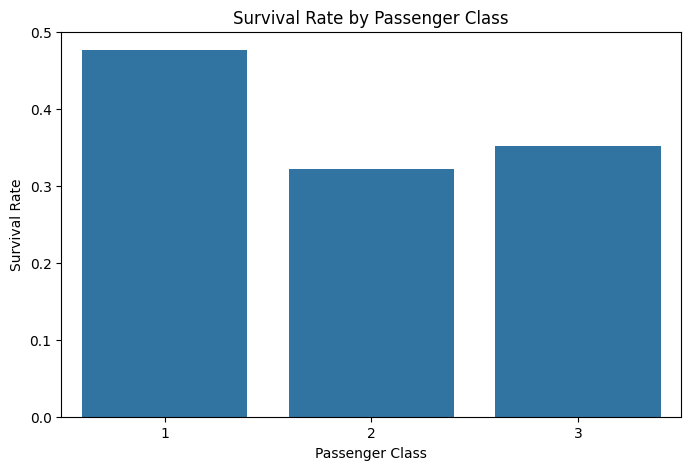

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Survival Rate by Class
plt.figure(figsize=(8, 5))
sns.barplot(x='Pclass', y='Survived', data=df_cleaned, ci=None)
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()

<ipython-input-11-ca8257bd7c2d>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Sex_male', y='Survived', data=df_cleaned, ci=None)


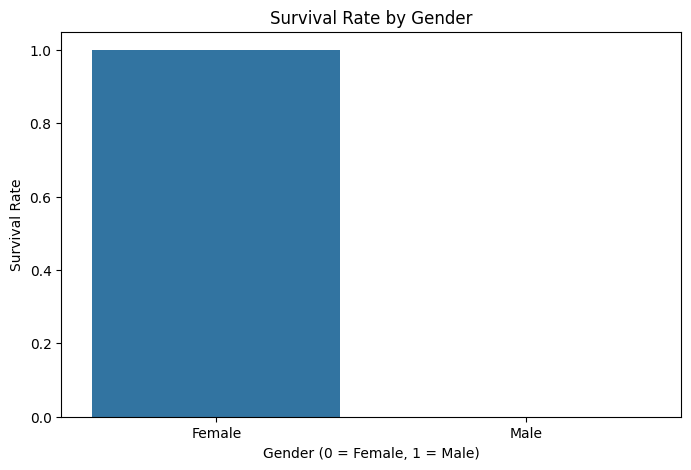

In [11]:
# 2. Gender-wise Survival Rate
plt.figure(figsize=(8, 5))
sns.barplot(x='Sex_male', y='Survived', data=df_cleaned, ci=None)
plt.title('Survival Rate by Gender')
plt.xlabel('Gender (0 = Female, 1 = Male)')
plt.ylabel('Survival Rate')
plt.xticks([0, 1], ['Female', 'Male'])
plt.show()

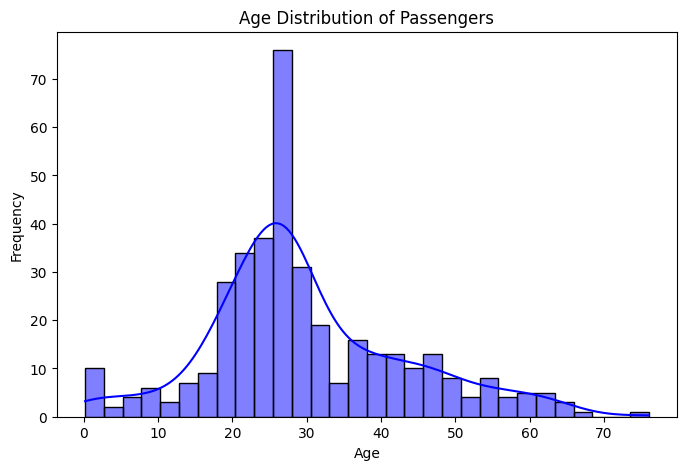

In [12]:
# 3. Age Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df_cleaned['Age'], kde=True, bins=30, color='blue')
plt.title('Age Distribution of Passengers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

<ipython-input-15-9a5dd705d2f4>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Embarked', y='Survived', data=df_cleaned, ci=None)


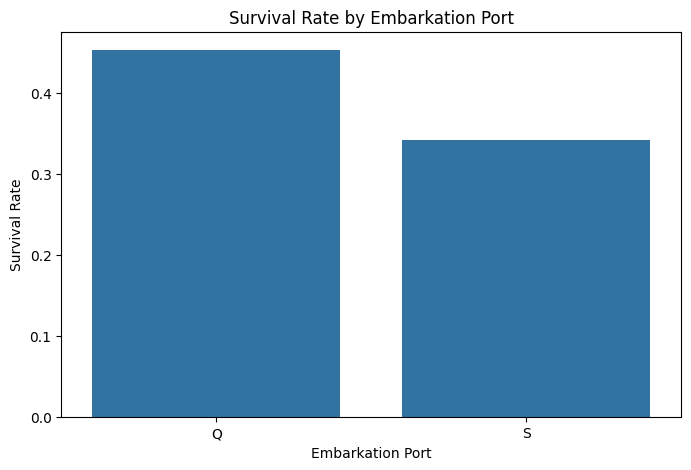

In [15]:
# 6. Survival Based on Embarkation Port
plt.figure(figsize=(8, 5))
embarked_columns = ['Embarked_Q', 'Embarked_S']
df_cleaned['Embarked'] = df_cleaned[embarked_columns].idxmax(axis=1).str.split('_').str[1]
sns.barplot(x='Embarked', y='Survived', data=df_cleaned, ci=None)
plt.title('Survival Rate by Embarkation Port')
plt.xlabel('Embarkation Port')
plt.ylabel('Survival Rate')
plt.show()

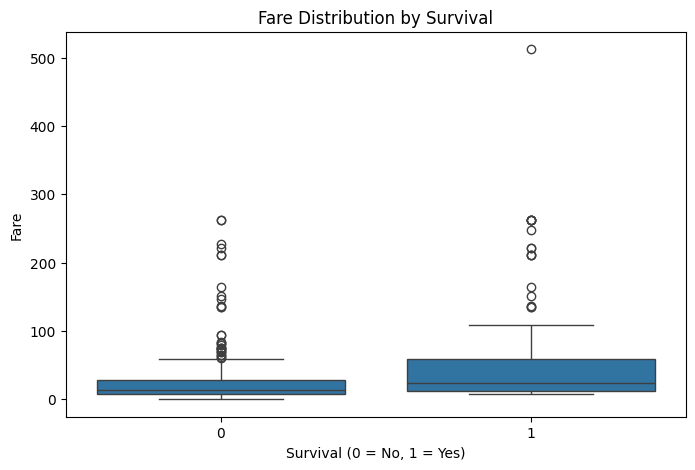

In [14]:

# 5. Fare Distribution
plt.figure(figsize=(8, 5))
sns.boxplot(x='Survived', y='Fare', data=df_cleaned)
plt.title('Fare Distribution by Survival')
plt.xlabel('Survival (0 = No, 1 = Yes)')
plt.ylabel('Fare')
plt.show()